# GRUPO 2

### *Integrantes:* 

1. Diego Alonso Gómez (20171738)
2. Alexander Pacheco (20161901)

## Question 1: Orthogonal Learning

1. Replicate Simulation Design 1 three times using different numbers of trials. So you have to use:

- The equation of Y for the three cases now is: Y = 5*D + beta*X + rnorm(n)
- B = 50 , B = 100, B = 1000.
- Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?
- Why does this happen? Give an econometric explanation of this.
- Label your axes and legends correctly your figures.

In [15]:
options(repr.plot.width = 10, repr.plot.height = 7.5)

# B=50

In [2]:
library(hdm)

set.seed(158)
B= 50 # trials
naive = rep(0, B)
orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
D=   X%*%gamma + rnorm(n)/4
Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

IDs_Sx = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #we do this to select covariates by Lasso

if (sum(IDs_Sx)==0) {naive[i] = lm(Y~ D)$coef[2]}
if (sum(IDs_Sx)>0) {naive[i] = lm(Y~ D + X[,IDs_Sx])$coef[2]}

#partialling out
RES_Y = rlasso(Y~ X, Post=F)$res
RESD_D = rlasso(D~ X, Post=F)$res
orthogonal[i]= lm(RES_Y ~ RESD_D)$coef[2]
}

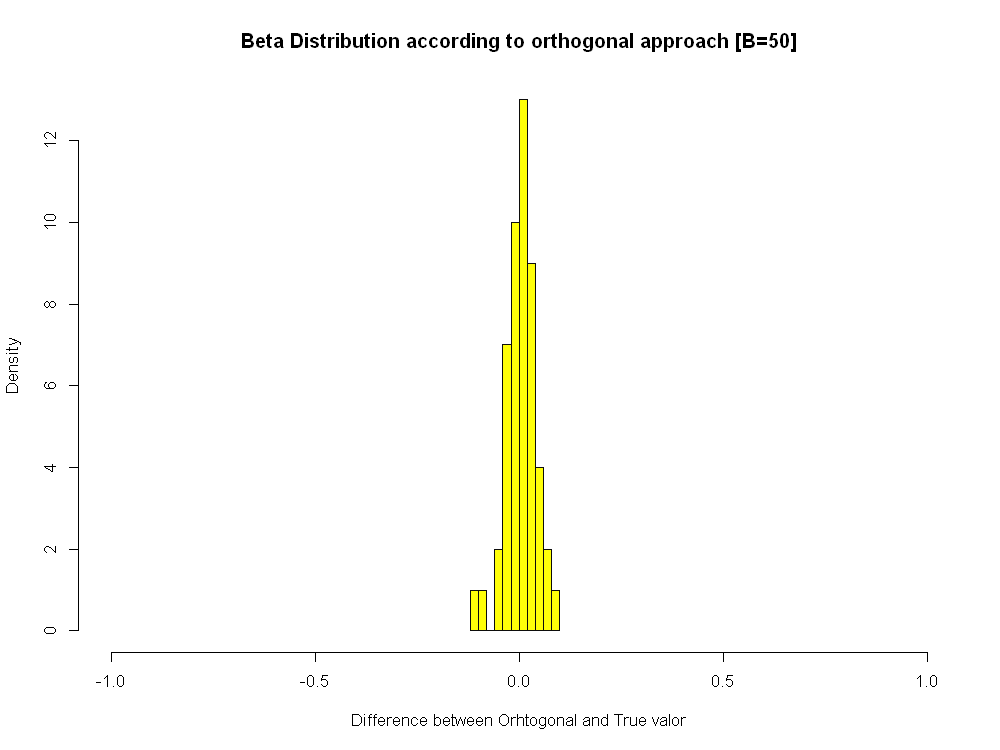

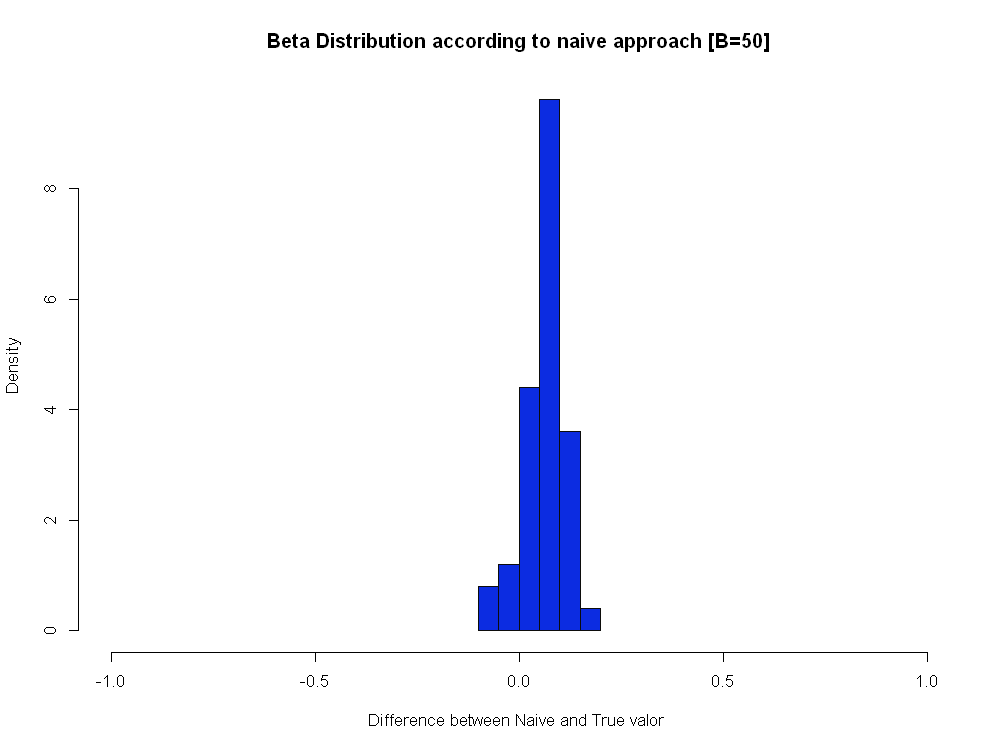

In [16]:
hist(orthogonal,col="#ffff09", freq=F, xlim= c(4, 6), xlab= "Difference between Orhtogonal and True valor", main="Beta Distribution according to orthogonal approach [B=50]", border="#0c0c0b")
hist(naive, col="#0c2ce1", freq=F, xlim= c(4,6), xlab= "Difference between Naive and True valor ", main = "Beta Distribution according to naive approach [B=50]", border="#0c0c0b")

# B=100

In [29]:
library(hdm)

set.seed(158)
B= 100 # trials
naive = rep(0, B)
orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
D=   X%*%gamma + rnorm(n)/4
Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

IDs_Sx = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #we do this to select covariates by Lasso

if (sum(IDs_Sx)==0) {naive[i] = lm(Y~ D)$coef[2]}
if (sum(IDs_Sx)>0) {naive[i] = lm(Y~ D + X[,IDs_Sx])$coef[2]}

#partialling out
RES_Y = rlasso(Y~ X, Post=T)$res
RESD_D = rlasso(D~ X, Post=T)$res
orthogonal[i]= lm(RES_Y ~ RESD_D)$coef[2]
}

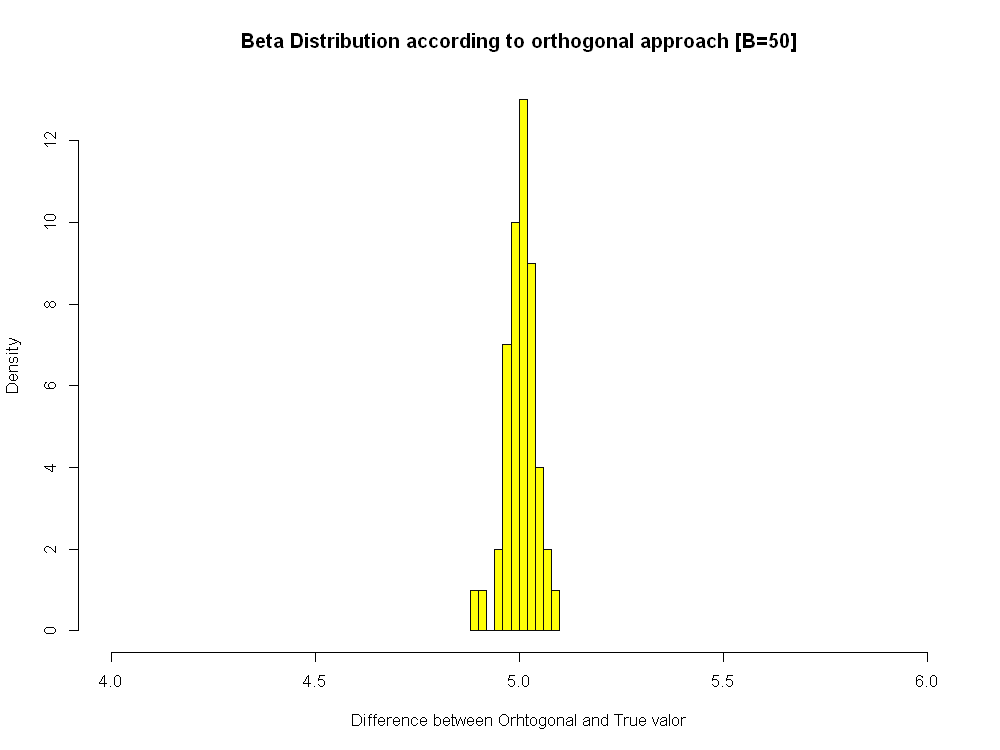

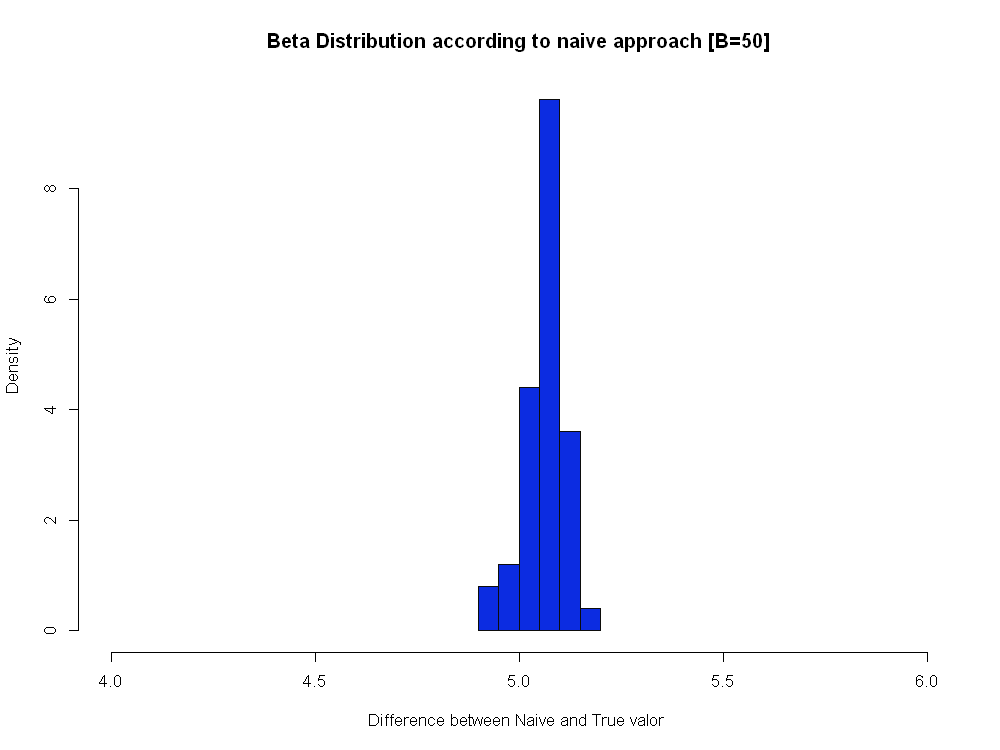

In [17]:
hist(orthogonal,col="#ffff09", freq=F, xlim= c(4, 6), xlab= "Difference between Orhtogonal and True valor", main="Beta Distribution according to orthogonal approach [B=50]", border="#0c0c0b")
hist(naive, col="#0c2ce1", freq=F, xlim= c(4,6), xlab= "Difference between Naive and True valor ", main = "Beta Distribution according to naive approach [B=50]", border="#0c0c0b")

# B=1,000

### No es posible de correr debido a la carga computacional del grupo:

In [ ]:
library(hdm)

set.seed(158)
B= 1000 # trials
naive = rep(0, B)
orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
D=   X%*%gamma + rnorm(n)/4
Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

IDs_Sx = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #we do this to select covariates by Lasso

if (sum(IDs_Sx)==0) {naive[i] = lm(Y~ D)$coef[2]}
if (sum(IDs_Sx)>0) {naive[i] = lm(Y~ D + X[,IDs_Sx])$coef[2]}

#partialling out
RES_Y = rlasso(Y~ X, Post=T)$res
RESD_D = rlasso(D~ X, Post=T)$res
orthogonal[i]= lm(RES_Y ~ RESD_D)$coef[2]
}

In [ ]:
hist(orthogonal,col="#ffff09", freq=F, xlim= c(4, 6), xlab= "Difference between Orhtogonal and True valor", main="Beta Distribution according to orthogonal approach [B=50]", border="#0c0c0b")
hist(naive, col="#0c2ce1", freq=F, xlim= c(4,6), xlab= "Difference between Naive and True valor ", main = "Beta Distribution according to naive approach [B=50]", border="#0c0c0b")

* ### Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?

First, we can see that, in the case of the Orthogonal approach, the distribution is more centered at 5 and resembles more a normal distribution with mean 5 . And for the Naive approach, we notice that it is more pulled towards 6.

A probably cause for this is that because the estimated beta is very close to the real value "5". That is, these values for the first graph (B=50) vary between 4.5 and 5.5 and for the other two graphs (B=100 especially) vary approximately between 4 and 6. On the other hand, in the Naive approach, the distribution shows that the estimated beta values are more centered on 5.5 or 6.

So, if we use the Naive approach we would not be able to make inference, that because this technique gives a slanted  estimator, probably because it does not takeinto account Neyman's Orthogonality problem.

- ### Why does this happen? Give an econometric explanation of this.

We do believe that Naive appoach is biased because the Orthogonality Principle is not being fullfiled with this technique.

To remember, the Orthogonality Principle consists in that there is no correlation between the regressor X and the perturbance term:

* Remembering our main equation: $Y=\alpha D+\beta'W+\epsilon$
* the Orthogonality Principle will consist in: $E[X~e]=0$

Therefore, when assumption 1 is violated, the partial derivatives will be different from 0 and the $𝛼$ will move as the previously estimated 𝛾 changes. The estimator will be biased, so inference will not be possible. 

# ---------------------------------------------------------------------------------------------------------

_____
## Question 2: Double Lasso - Testing the Convergence Hypothesis
_____

1. Explain what is the Double Lasso Approach in a markdown cell. Use equations for a better explanation.

2. Replicate the results using the next approaches:
- OLS
- Double LASSO using cross Validation (GLMNET in R and Sklearn in Python )
- Double Lasso using theoretical Lambda (HDM package both in R and Python)
- Double Lasso using method="partialling out", this is a direct way to get results from the HDM package, check the Python script for an example, and also you have to read the documentation for more details.
- Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure.

## 1.  Explanation of Double Lasso Approach:

The Double Lasso Approach is useful when we want to estimate a model with a large number of covariates relative to the number of observations. That because the Double Lasso method efficiently selects the relevant covariates for said estimation through two Lasso regression and an OLS one at the end. 

So, to explain this idea better, we privde an example where we want to estimate it:

\begin{equation}\label{original}
Y_t = \theta X_t + \beta 'W_t+ \epsilon_1 \tag{1}.
\end{equation}

Where $X_t$ is our variable of interest, and $W_t$ is a set of control variables.

The Double Lasso approach consists of estimating $(2)$ and $(3)$ via Lasso:

\begin{equation}\label{Y}
Y_t = \gamma_{YX} 'X_t+ \mu_{YX} \tag{2}
\end{equation}

\begin{equation}\label{D}
X_t = \gamma_{XW} 'W_t+ \mu_{XW} \tag{3}
\end{equation}

Once we run these regressions, we estimate the error of each equation, that is $\hat\mu_{YX}$ and $\hat\mu_{XW}$.

Finally, we estimate this last expression using OLS:

\begin{equation}\label{mu}
\hat\mu_{YX} = \alpha\hat\mu_{XW}+ \epsilon_2 \tag{4}
\end{equation}

## 2.  Replicate the results using the next approaches:

In [35]:
library(hdm)
library(xtable)
GrowthData <- GrowthData
save(GrowthData, file = "../data/GrowthData.RData")
library(hdm)
df_growth <- GrowthData
attach(df_growth)
names(df_growth)

# METHOD 1: OLS

In [38]:
reg.ols <- lm(Outcome~.-1,data=df_growth)
summary(reg.ols)


Call:
lm(formula = Outcome ~ . - 1, data = df_growth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040338 -0.011298 -0.000863  0.011813  0.043247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
intercept  2.472e-01  7.845e-01   0.315  0.75506   
gdpsh465  -9.378e-03  2.989e-02  -0.314  0.75602   
bmp1l     -6.886e-02  3.253e-02  -2.117  0.04329 * 
freeop     8.007e-02  2.079e-01   0.385  0.70300   
freetar   -4.890e-01  4.182e-01  -1.169  0.25214   
h65       -2.362e+00  8.573e-01  -2.755  0.01019 * 
hm65       7.071e-01  5.231e-01   1.352  0.18729   
hf65       1.693e+00  5.032e-01   3.365  0.00223 **
p65        2.655e-01  1.643e-01   1.616  0.11727   
pm65       1.370e-01  1.512e-01   0.906  0.37284   
pf65      -3.313e-01  1.651e-01  -2.006  0.05458 . 
s65        3.908e-02  1.855e-01   0.211  0.83469   
sm65      -3.067e-02  1.168e-01  -0.263  0.79479   
sf65      -1.799e-01  1.181e-01  -1.523  0.13886   
fert65     6.881e-03  2.705e-02   0.

We determine the regression coefficient $\beta_1$ of the target regressor *gdpsh465* ($D$), its 95% confidence interval and the standard error.

In [69]:
estimator_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

standard_error_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

bounds <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(estimator_ols,standard_error_ols,bounds[1],bounds[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [70]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(estimator_ols,standard_error_ols,bounds[1],bounds[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab1<- xtable(table, digits = 3) 

<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

Least squares provides a rather noisy estimate (high standard error) of the speed of convergence, and does not allow us to answer the question about the convergence hypothesis since the confidence interval includes zero.

In contrast, we can use the partialling-out approach based on lasso regression ("Double Lasso").

# Method 2 - Double LASSO using cross Validation (GLMNET) 

In [44]:
A <- as.matrix(df_growth)[, 1, drop = F] # output variable
X <- as.matrix(df_growth)[, -c(1, 2,3)] # controls
Z <- as.matrix(df_growth)[, 3, drop = F] # target regressor
dim(X)
dim(A)
dim(Z)

[1] 90 60

[1] 90  1

[1] 90  1

In [45]:
library(glmnet)
fit.lasso.cv  <- cv.glmnet(x=X,y=A, family="gaussian", alpha=1)
yhat.lasso.cv <- predict(fit.lasso.cv,newx=X)
r.A <- A-yhat.lasso.cv # creates the "residual" output variable

fit.lasso.cv  <- cv.glmnet(x=X,y=Z, family="gaussian", alpha=1)
yhat.lasso.cv <- predict(fit.lasso.cv,newx=X)
r.Z <- A-yhat.lasso.cv  # creates the "residual" target regressor

partial.lasso <- lm(r.A ~ r.Z)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]


In [68]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - GLMNET")
tab2<- xtable(table, digits = 3)
tab2

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
LASSO - GLMNET,-0.04981147,0.01393636,-0.07750705,-0.02211588


# Method 3 - Double Lasso using theoretical Lambda (HDM)

We can use the partialling-out approach based on lasso regression ("Double Lasso")

In [47]:
Q <- df_growth[, 1, drop = F] # output variable
K <- as.matrix(df_growth)[, -c(1, 2,3)] # controls
B <- df_growth[, 3, drop = F] # target regressor
dim(K)
dim(Q)
dim(B)

[1] 90 60

[1] 90  1

[1] 90  1

In [48]:
r.Q <- rlasso(x=K,y=Q)$res # creates the "residual" output variable
r.B <- rlasso(x=K,y=B)$res # creates the "residual" target regressor
partial.lasso <- lm(r.Q ~ r.B)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]

In [66]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - HBM")
tab3<- xtable(table, digits = 3)
tab3

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
LASSO - HBM,-0.04981147,0.01393636,-0.07750705,-0.02211588


# Method 4 - Double Lasso using method="partialling out"

In [55]:
O <- df_growth[, 1, drop = F] # output variable
R <- as.matrix(df_growth)[, -c(1, 2,3)] # controls
J <- df_growth[, 3, drop = F] # target regressor

In [56]:
lasso_direct = rlassoEffect(x = R, y = O, d = J, method = "partialling out")
names(lasso_direct)

[1] "alpha"            "se"               "t"                "pval"            
 [5] "coefficients"     "coefficient"      "coefficients.reg" "selection.index" 
 [9] "residuals"        "call"             "samplesize"

In [57]:
est_lasso = lasso_direct$coefficients
std_lasso = lasso_direct$se
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso

In [67]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - PARTIALLING OUT")
tab4<- xtable(table, digits = 3)
tab4

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
LASSO - PARTIALLING OUT,-0.04981147,0.01393636,-0.07750705,-0.02211588


# Plot the main coefficient and its confidence interval

Finally, let us have a look at the results.

In [25]:
Table_Final=rbind(tab1,tab2,tab3,tab4)
Table_Final

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.009377989,0.029887726,-0.070600221,0.05184424
LASSO - GLMNET,0.003739563,0.005887944,-0.007961487,0.01544061
LASSO - HDM,-0.049811465,0.013936358,-0.077507049,-0.02211588
LASSO - PARTIALLING OUT,-0.049811465,0.013936358,-0.077507049,-0.02211588


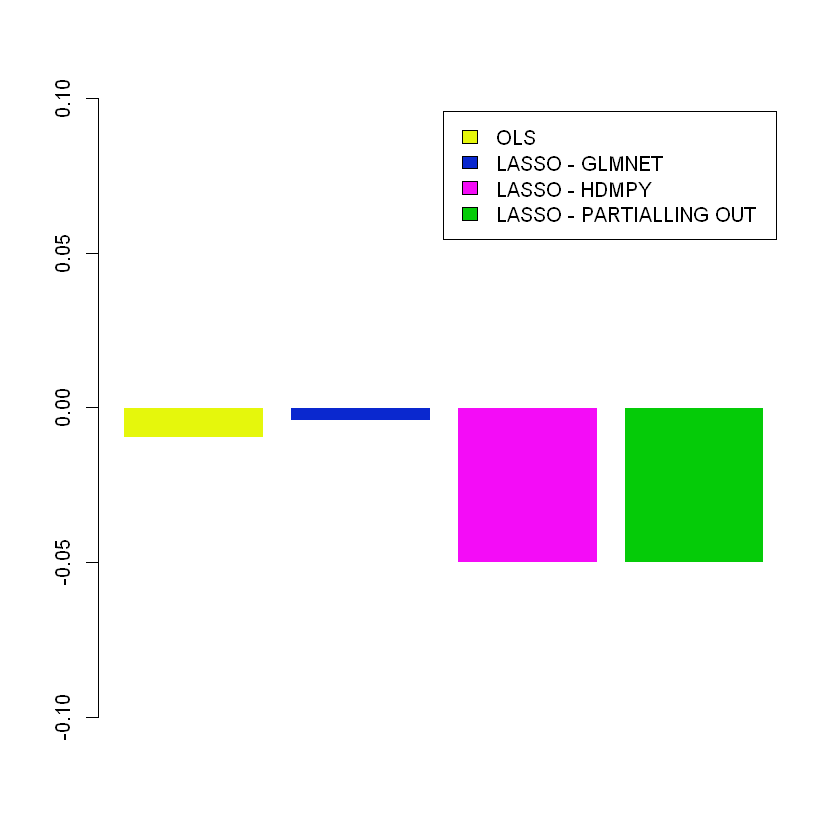

In [65]:
Base=data.frame(Metodo=c("OLS","LASSO - GLMNET","LASSO - HDMPY","LASSO - PARTIALLING OUT"), 
     Estimador=c(tab1$estimator,tab2$estimator,tab3$estimator,tab4$estimator))

barplot(Base$Estimador,col=c("#e5f70c","#0a28cf","#f40cf7","#05cb08"),ylim=c(-0.1,0.1),legend.text=Base$Metodo, border='white')